Button(description='Show Dataframe', style=ButtonStyle())

,Country (or dependency),Population (2020),Yearly Change,Net Change,Density (P/Km²),Land Area (Km²),Migrants (net),Fert. Rate,Med. Age,Urban Pop %,World Share
0,China,1440297825,0.39 %,5540090,153,9388211,-348399.0,1.7,38,61 %,18.47 %
1,India,1382345085,0.99 %,13586631,464,2973190,-532687.0,2.2,28,35 %,17.70 %
2,United States,331341050,0.59 %,1937734,36,9147420,954806.0,1.8,38,83 %,4.25 %
3,Indonesia,274021604,1.07 %,2898047,151,1811570,-98955.0,2.3,30,56 %,3.51 %
4,Pakistan,221612785,2.00 %,4327022,287,770880,-233379.0,3.6,23,35 %,2.83 %
...,...,...,...,...,...,...,...,...,...,...,...
230,Montserrat,4993,0.06 %,3,50,100,NaN,N.A.,N.A.,10 %,0.00 %
231,Falkland Islands,3497,3.05 %,103,0,12170,NaN,N.A.,N.A.,66 %,0.00 %
232,Niue,1628,0.68 %,11,6,260,NaN,N.A.,N.A.,46 %,0.00 %
233,Tokelau,1360,1.27 %,17,136,10,NaN,N.A.,N.A.,0 %,0.00 %


interactive(children=(Dropdown(description='xaxis', options=('Country (or dependency)', 'Population (2020)', '…

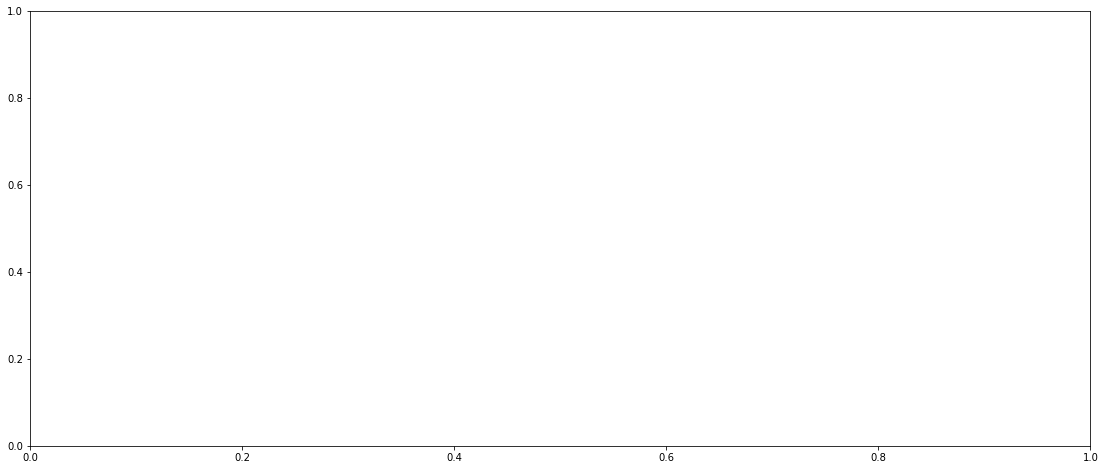

In [6]:
from ipywidgets import widgets
from IPython.display import display, clear_output
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

graph_type = ['Choose A Graph Type', 'bubble', 'bar']
df = pd.read_csv("population_by_country_2020.csv")

def print_dataframe(b):
    global df
    display(df)
    head_tail_list = ["head", "tail"]
    xlabel_widget = widgets.Dropdown(options=df.columns)
    ylabel_widget = widgets.Dropdown(options=df.columns)
    graph_widget = widgets.Dropdown(options=graph_type)
    head_tail_widget = widgets.Dropdown(options=head_tail_list)
    row_range_widget = widgets.Dropdown(options=[10, 20, 30])
    graph = widgets.interactive(display_plot, xaxis=xlabel_widget, yaxis=ylabel_widget, head_tail=head_tail_widget, number=row_range_widget, graph_type=graph_widget)
    display(graph)

def display_plot(xaxis, yaxis, head_tail, number, graph_type):
    global df
    if(head_tail == "head"):
        dataframe = df.head(number)
    else:
        dataframe = df.tail(number)
    
    if(graph_type == "bubble"):
        if(dataframe[yaxis].dtypes == 'int64'):
            plt.subplots(figsize=(19,8))
            plt.scatter(dataframe[xaxis], dataframe[yaxis], c=rgb, alpha=0.4, s=dataframe[yaxis]/40000)
            plt.xlabel(xaxis)
            plt.ylabel(yaxis)
            plt.xticks(rotation="vertical")
            plt.show()
        else:
            print("Bubble graph can't be plotted")
    
    elif(graph_type == "bar"):
            plt.subplots(figsize=(19,8))
            plt.bar(dataframe[xaxis], dataframe[yaxis], color=["red", "blue", "yellow", "pink", "green"])
            plt.xlabel(xaxis)
            plt.ylabel(yaxis)
            plt.xticks(rotation="vertical")
            plt.show()    
    else:
        print("Choose valid graph")

show_dataframe = widgets.Button(description="Show Dataframe")
show_dataframe.on_click(print_dataframe) 
display(show_dataframe)